In [72]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
# 2. Generate Simulated Data
brands = ["Samsung", "Apple", "Xiaomi", "Huawei"]
years = list(range(2015, 2025))
quarters = ["Q1", "Q2", "Q3", "Q4"]


In [74]:
data = []
np.random.seed(42)

for brand in brands:
    for year in years:
        for quarter in quarters:
            units = np.random.uniform(20, 90) if brand in ["Samsung", "Apple"] else np.random.uniform(10, 50)
            price = np.random.uniform(250, 1000)
            revenue = units * price / 1000
            share = np.random.uniform(10, 30) if brand in ["Samsung", "Apple"] else np.random.uniform(5, 15)
            rnd = np.random.uniform(0.2, 2.5)
            data.append([brand, year, quarter, round(units, 2), round(revenue, 2), 
                         round(price, 2), round(share, 2), round(rnd, 2)])
            columns = ["Brand", "Year", "Quarter", "Units_Shipped_Million", "Revenue_Billion_USD", 
           "Average_Selling_Price", "Market_Share_Percent", "R&D_Expenditure_Billion"]

df = pd.DataFrame(data, columns=columns)


In [75]:
# 3. Data Cleaning
df_clean = df.dropna()

In [76]:
# 4. Validate
print("Number of Rows:", len(df_clean))
print("Null Values:\n", df_clean.isnull().sum())

Number of Rows: 160
Null Values:
 Brand                      0
Year                       0
Quarter                    0
Units_Shipped_Million      0
Revenue_Billion_USD        0
Average_Selling_Price      0
Market_Share_Percent       0
R&D_Expenditure_Billion    0
dtype: int64


In [77]:
# 5. NumPy Operations
units_array = df_clean["Units_Shipped_Million"].values
revenue_array = df_clean["Revenue_Billion_USD"].values
print("\nNumPy Operations:")
print("Mean Units Shipped:", np.mean(units_array))
print("Median Units Shipped:", np.median(units_array))
print("Std Dev Units Shipped:", np.std(units_array))
print("Max Revenue:", np.max(revenue_array))
print("Min Revenue:", np.min(revenue_array))




NumPy Operations:
Mean Units Shipped: 41.98225
Median Units Shipped: 38.135
Std Dev Units Shipped: 21.73719735125713
Max Revenue: 82.87
Min Revenue: 3.56


In [78]:
# 6. SciPy T-Test (Apple vs Xiaomi)

# Ensure both brands exist in the cleaned DataFrame
if "Apple" in df_clean["Brand"].unique() and "Xiaomi" in df_clean["Brand"].unique():
    # Extract data
    apple_units = df_clean[df_clean["Brand"] == "Apple"]["Units_Shipped_Million"]
    xiaomi_units = df_clean[df_clean["Brand"] == "Xiaomi"]["Units_Shipped_Million"]
    
    # Ensure we have enough data points
    if len(apple_units) > 1 and len(xiaomi_units) > 1:
        # Perform t-test
        from scipy.stats import ttest_ind
        t_stat, p_val = ttest_ind(apple_units, xiaomi_units, equal_var=False)

        print("\nT-Test (Apple vs Xiaomi):")
        print("T-Statistic:", t_stat)
        print("P-Value:", p_val)
    else:
        print("Not enough data for Apple or Xiaomi for t-test.")
else:
    print("Apple or Xiaomi not found in the dataset.")


T-Test (Apple vs Xiaomi):
T-Statistic: 7.822626489376201
P-Value: 6.044635660927274e-11


In [79]:
# 7. Statsmodels Regression (Average Selling Price vs Units Shipped)

try:
    import statsmodels.formula.api as smf

    # Ensure there are no nulls in the relevant columns
    df_reg = df_clean[["Average_Selling_Price", "Units_Shipped_Million"]].dropna()

    # Confirm enough data
    if len(df_reg) > 10:
        # Run linear regression
        model = smf.ols("Units_Shipped_Million ~ Average_Selling_Price", data=df_reg).fit()
        print("\nRegression Summary:\n")
        print(model.summary())
    else:
        print("Not enough data for regression.")
except Exception as e:
    print("Regression failed:", e)


Regression Summary:

                              OLS Regression Results                             
Dep. Variable:     Units_Shipped_Million   R-squared:                       0.000
Model:                               OLS   Adj. R-squared:                 -0.006
Method:                    Least Squares   F-statistic:                   0.05703
Date:                   Wed, 21 May 2025   Prob (F-statistic):              0.812
Time:                           16:41:54   Log-Likelihood:                -719.65
No. Observations:                    160   AIC:                             1443.
Df Residuals:                        158   BIC:                             1449.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


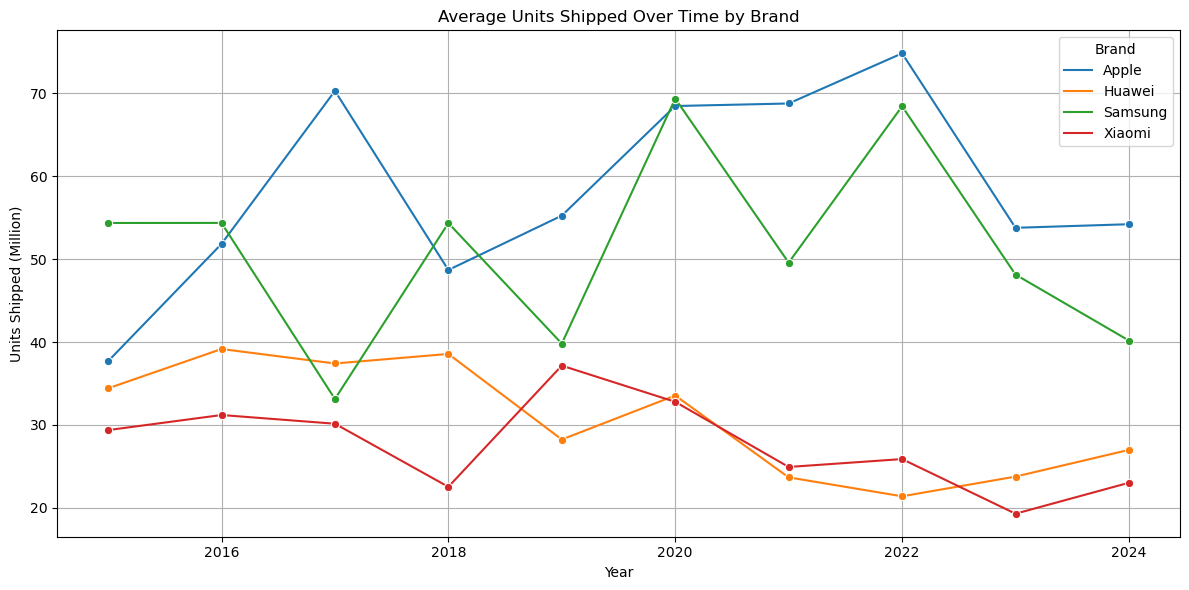

In [83]:
# 8. Visualization: Line Plot of Units Shipped Over Time by Brand

import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Aggregate quarterly data to yearly average units shipped per brand
    df_yearly_units = (
        df_clean.groupby(["Brand", "Year"])["Units_Shipped_Million"]
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_yearly_units, x="Year", y="Units_Shipped_Million", hue="Brand", marker="o")

    plt.title("Average Units Shipped Over Time by Brand")
    plt.ylabel("Units Shipped (Million)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print("Line plot failed:", e)


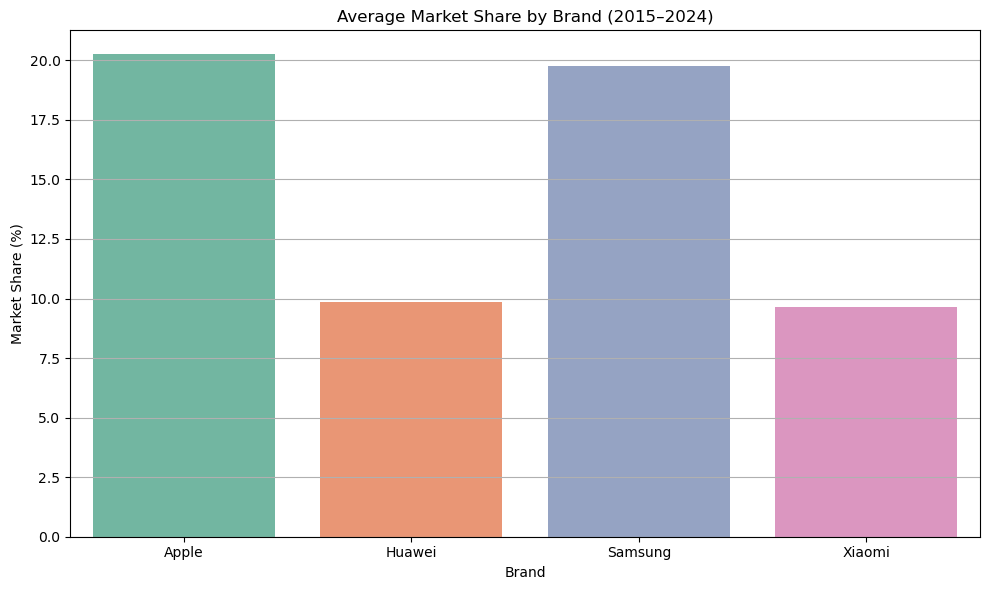

In [81]:
# 9. Visualization: Bar Plot of Average Market Share by Brand

import matplotlib.pyplot as plt
import seaborn as sns

try:
    plt.figure(figsize=(10, 6))

    # Compute average market share per brand
    market_share_avg = df_clean.groupby("Brand")["Market_Share_Percent"].mean().reset_index()

    # Create bar plot
    sns.barplot(data=market_share_avg, x="Brand", y="Market_Share_Percent", palette="Set2")

    plt.title("Average Market Share by Brand (2015–2024)")
    plt.ylabel("Market Share (%)")
    plt.xlabel("Brand")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print("Bar plot failed:", e)

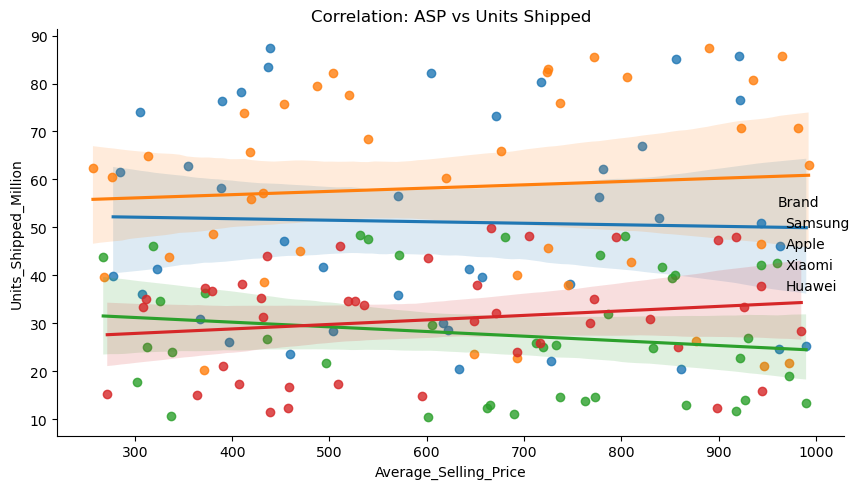

In [82]:
# 10. Correlation Plot with Regression Line
sns.lmplot(data=df_clean, x="Average_Selling_Price", y="Units_Shipped_Million", hue="Brand", aspect=1.5)
plt.title("Correlation: ASP vs Units Shipped")
plt.tight_layout()
plt.show()